## Sentiment Analysis of News Organization's Tweets
*  At the time of this analyis CNN and Fox had the most overall positive tweets on average. 
* When run multiple times at different times during the day, Fox News consitently had more positively rated tweets, which may make sense since they are in support of the current administration versus other news organizations. 
* Overall BBC World has had some of the more negatively scored tweets by far according to the Vader Analysis. This may be due to the wider range of geographic areas covered in their news coverage.  


In [11]:
#Import dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [12]:
#Import Vader Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [13]:
#Import keys for using tweepy
from configtwit import consumer_key, consumer_secret, access_token, access_secret

In [14]:
#Define authorization and access tokens and set twitter API wrapper with authorization and parser object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, parser= tweepy.parsers.JSONParser())

In [15]:
user_tweets = api.user_timeline("@BBCWorld")
print(analyzer.polarity_scores(user_tweets[19]["text"]))
      
#results = analyzer.polarity_scores(user_tweets[i]["text"])


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [16]:
#Put together list of news organizations for tweets to analyze
targetusers = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]

sentiments = []


oldest_tweet = None

counter = 0

#Loop through all target users
#max_id – Returns only statuses with an ID less than (that is, older than) or equal to the specified ID
for user in targetusers:
    oldest_tweet = None
    
    counter = 0
    #loop through 5 pages of tweets (100 tweets in total for each target user)   
    for x in range(5):
        user_tweets = api.user_timeline(user, max_id = oldest_tweet, page = x)
        #print(user_tweets)
        
        
        for i in range(20):
#         for tweet in user_tweets:
            
            results = analyzer.polarity_scores(user_tweets[i]["text"])
            
            compound = results["compound"]
            pos = results["pos"]
            neg = results['neg']
            neu = results["neu"]
            
            
            oldest_tweet = (user_tweets[i]["id"])-1
            
            sentiments.append({"News Organization": user,
                               "Date": user_tweets[i]["created_at"],
                              "Compound Score": compound,
                              "Positive Score": pos,
                              "Negative Score": neg,
                              "Neutral Score": neu,
                             "Tweets Ago": counter})
            
           

            counter += 1
            
            
            
print(sentiments[0])


{'News Organization': '@BBCWorld', 'Date': 'Wed Aug 01 03:02:23 +0000 2018', 'Compound Score': 0.0, 'Positive Score': 0.0, 'Negative Score': 0.0, 'Neutral Score': 1.0, 'Tweets Ago': 0}


In [17]:
news_sentiments_df = pd.DataFrame(sentiments)
news_sentiments_df.head()

,Compound Score,Date,Negative Score,Neutral Score,News Organization,Positive Score,Tweets Ago
0,0.0000,Wed Aug 01 03:02:23 +0000 2018,0.000,1.000,@BBCWorld,0.000,0
1,-0.7351,Wed Aug 01 02:56:19 +0000 2018,0.408,0.592,@BBCWorld,0.000,1
2,0.0000,Wed Aug 01 02:13:11 +0000 2018,0.000,1.000,@BBCWorld,0.000,2
3,-0.5423,Wed Aug 01 01:53:35 +0000 2018,0.429,0.571,@BBCWorld,0.000,3
4,0.2023,Tue Jul 31 23:25:26 +0000 2018,0.000,0.833,@BBCWorld,0.167,4


In [18]:
print(targetusers)

['@BBCWorld', '@CBSNews', '@CNN', '@FoxNews', '@nytimes']


In [19]:

BBC_df = news_sentiments_df[news_sentiments_df["News Organization"]== "@BBCWorld"]
Fox_df = news_sentiments_df[news_sentiments_df["News Organization"]== "@FoxNews"]
CBS_df = news_sentiments_df[news_sentiments_df["News Organization"]== "@CBSNews"]
CNN_df = news_sentiments_df[news_sentiments_df["News Organization"]== "@CNN"]
NYT_df = news_sentiments_df[news_sentiments_df["News Organization"]== "@nytimes"]

#BBC_df = BBC_df.set_index("News Organization")

# print(len(news_sentiments_df))
# print(len(BBC_df))
CNN_df.head()

,Compound Score,Date,Negative Score,Neutral Score,News Organization,Positive Score,Tweets Ago
200,0.0000,Wed Aug 01 03:09:41 +0000 2018,0.000,1.000,@CNN,0.000,0
201,0.4310,Wed Aug 01 03:01:05 +0000 2018,0.000,0.881,@CNN,0.119,1
202,0.4019,Wed Aug 01 02:59:15 +0000 2018,0.000,0.886,@CNN,0.114,2
203,-0.4019,Wed Aug 01 02:58:08 +0000 2018,0.124,0.876,@CNN,0.000,3
204,0.0000,Wed Aug 01 02:57:59 +0000 2018,0.000,1.000,@CNN,0.000,4


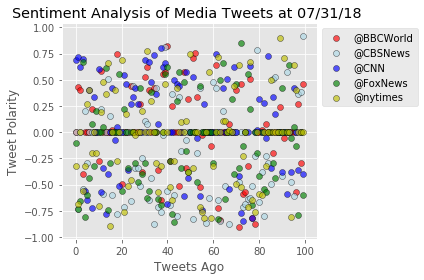

In [20]:
CNNplot = plt.scatter(CNN_df["Tweets Ago"], CNN_df["Compound Score"], c = "r", marker = "o", alpha = 0.65, edgecolor = "black")
BBCplot = plt.scatter(BBC_df["Tweets Ago"], BBC_df["Compound Score"], c = "lightblue", marker = "o", alpha = 0.65, edgecolor = "black")
Foxplot = plt.scatter(Fox_df["Tweets Ago"], Fox_df["Compound Score"], c = "b", marker = "o", alpha = 0.65, edgecolor = "black")
CBSplot= plt.scatter(CBS_df["Tweets Ago"], CBS_df["Compound Score"], c = "g", marker = "o", alpha = 0.65, edgecolor = "black")
NYTplot= plt.scatter(NYT_df["Tweets Ago"], NYT_df["Compound Score"], c = "y", marker = "o", alpha = 0.65, edgecolor = "black")

plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets at %s " %time.strftime("%x"))
plt.legend(targetusers, bbox_to_anchor = (1,1))
plt.tight_layout()
plt.savefig("Output/NewsSentimentsScatter.png")
plt.grid(True)
plt.show()

In [19]:
print(targetusers)

['@BBCWorld', '@CBSNews', '@CNN', '@FoxNews', '@nytimes']


In [24]:
averagesgroup = news_sentiments_df.groupby("News Organization").mean()["Compound Score"]

averagesgroup.head()



News Organization
@BBCWorld   -0.171370
@CBSNews    -0.093966
@CNN         0.020430
@FoxNews     0.059172
@nytimes    -0.052380
Name: Compound Score, dtype: float64

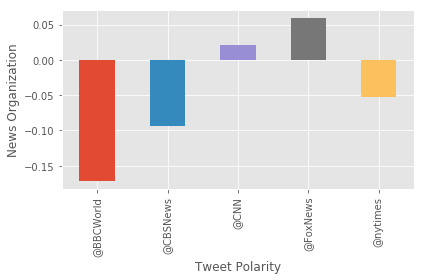

In [25]:
averagesgroup.plot(kind = "bar", align = "center")
plt.xlabel("Tweet Polarity")
plt.ylabel("News Organization")
plt.savefig("Output/CompoundScoreAverageNews.png")
plt.tight_layout()
plt.show()